# RMSProp - momentum

RMSProp:

Gradient descent is an optimization algorithm that follows the negative gradient of an objective function in order to locate the minimum of the function.

A limitation of gradient descent is that it uses the same step size (learning rate) for each input variable. AdaGrad, for short, is an extension of the gradient descent optimization algorithm that allows the step size in each dimension used by the optimization algorithm to be automatically adapted based on the gradients seen for the variable (partial derivatives) over the course of the search.

A limitation of AdaGrad is that it can result in a very small step size for each parameter by the end of the search that can slow the progress of the search down too much and may mean not locating the optima.

Root Mean Squared Propagation, or RMSProp, is an extension of gradient descent and the AdaGrad version of gradient descent that uses a decaying average of partial gradients in the adaptation of the step size for each parameter. The use of a decaying moving average allows the algorithm to forget early gradients and focus on the most recently observed partial gradients seen during the progress of the search, overcoming the limitation of AdaGrad.


Momentum

Momentum is an extension to the gradient descent optimization algorithm, often referred to as gradient descent with momentum.

It is designed to accelerate the optimization process, e.g. decrease the number of function evaluations required to reach the optima, or to improve the capability of the optimization algorithm, e.g. result in a better final result.

A problem with the gradient descent algorithm is that the progression of the search can bounce around the search space based on the gradient. For example, the search may progress downhill towards the minima, but during this progression, it may move in another direction, even uphill, depending on the gradient of specific points (sets of parameters) encountered during the search.

This can slow down the progress of the search, especially for those optimization problems where the broader trend or shape of the search space is more useful than specific gradients along the way.

One approach to this problem is to add history to the parameter update equation based on the gradient encountered in the previous updates.

This change is based on the metaphor of momentum from physics where acceleration in a direction can be accumulated from past updates.



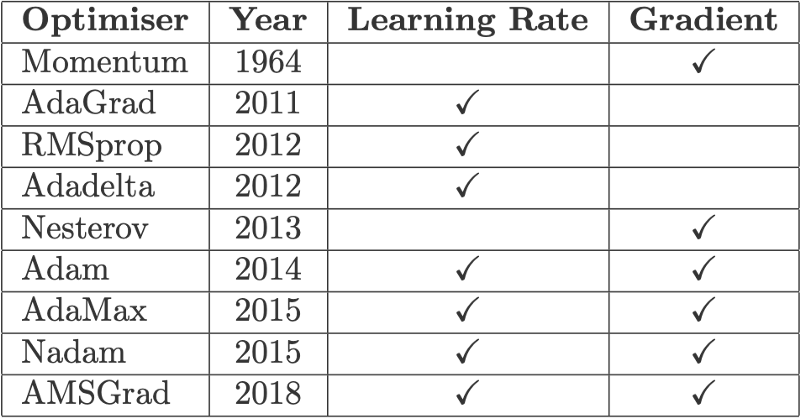


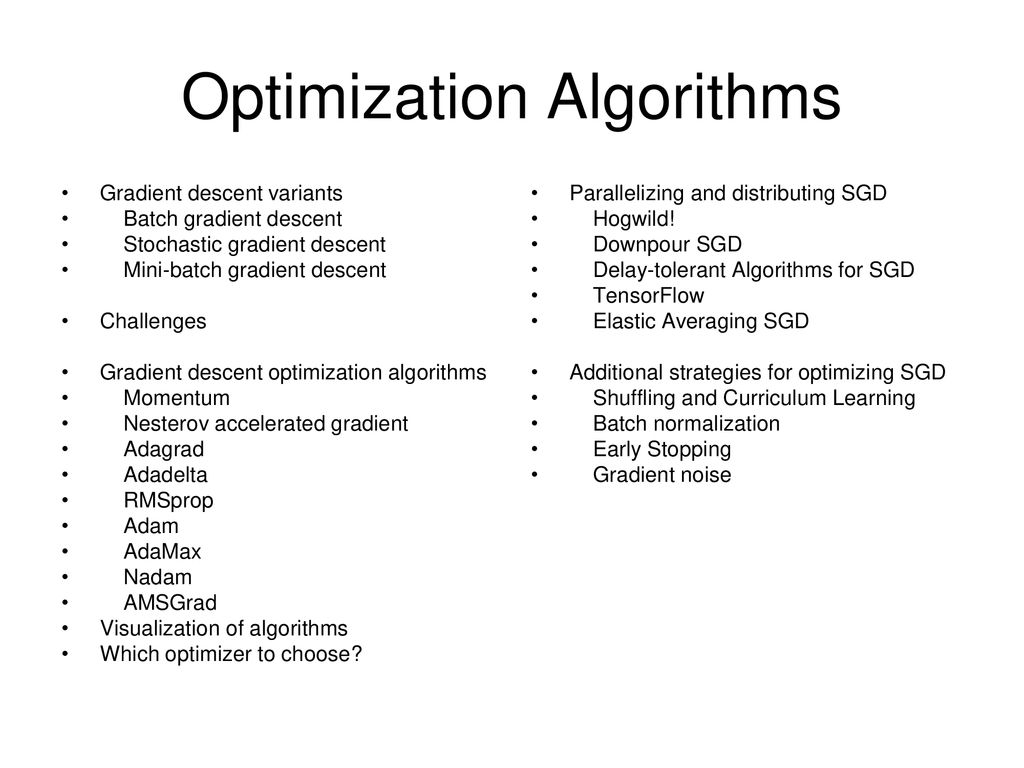

In [3]:
from IPython.display import IFrame
IFrame("OPTIMIZATION.pdf",900,500)

In [4]:
from IPython.display import IFrame
IFrame("https://machinelearningmastery.com/gradient-descent-with-rmsprop-from-scratch/",900,500)

In [5]:
from IPython.display import IFrame
IFrame("https://machinelearningmastery.com/gradient-descent-with-momentum-from-scratch/",900,500)

# Impelementing Division and Agglomerative

In [11]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
 
# randomly chosen dataset
X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])
 
# here we need to mention the number of clusters
# otherwise the result will be a single cluster
# containing all the data
clustering = AgglomerativeClustering(n_clusters = 2).fit(X)
 
# print the class labels
print(clustering.labels_)

C:\Users\moham\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[1 1 1 0 0 0]


In [2]:
from sklearn.cluster import BisectingKMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0],
              [10, 6], [10, 8], [10, 10]])
bisect_means = BisectingKMeans(n_clusters=3, random_state=0).fit(X)
bisect_means.labels_

bisect_means.predict([[0, 0], [12, 3]])

bisect_means.cluster_centers_

C:\Users\moham\anaconda3\lib\site-packages\sklearn\cluster\_bisect_k_means.py:259: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([[10.,  2.],
       [10.,  8.],
       [ 1.,  2.]])

In [1]:
import sklearn
sklearn.__version__


'1.1.2'

# When we use Division 

<b>Hierarchical Agglomerative vs Divisive clustering – </b>

- Divisive clustering is more complex as compared to agglomerative clustering, as in the case of divisive clustering we need a flat clustering method as “subroutine” to split each cluster until we have each data having its own singleton cluster.
- Divisive clustering is more efficient if we do not generate a complete hierarchy all the way down to individual data leaves. The time complexity of a naive agglomerative clustering is O(n3) because we exhaustively scan the N x N matrix dist_mat for the lowest distance in each of N-1 iterations. Using priority queue data structure we can reduce this complexity to O(n2logn). By using some more optimizations it can be brought down to O(n2). Whereas for divisive clustering given a fixed number of top levels, using an efficient flat algorithm like K-Means, divisive algorithms are linear in the number of patterns and clusters.
- A divisive algorithm is also more accurate. Agglomerative clustering makes decisions by considering the local patterns or neighbor points without initially taking into account the global distribution of data. These early decisions cannot be undone. whereas divisive clustering takes into consideration the global distribution of data when making top-level partitioning decisions.


# Automate Clustring

In [19]:
! pip install automeans

  Using cached automeans-1.0.0-py3-none-any.whl (7.5 kB)
  Using cached kneed-0.8.1-py2.py3-none-any.whl (10 kB)


In [4]:
import numpy as np
X = np.array([[1, 2], [2, 5], [3, 6], [8, 7], [8, 8], [7, 3]])

from automeans.cluster import ameans
# Initialize the model
AM = ameans(max_clusters = 5, metrics = 'standard')
# Fit on data 'X'
model, cluster = AM.fit(X)
# Predict the cluster on data 'X'
predictions = model.predict(X)

TypeError: __init__() got an unexpected keyword argument 'precompute_distances'

C:\Users\moham\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


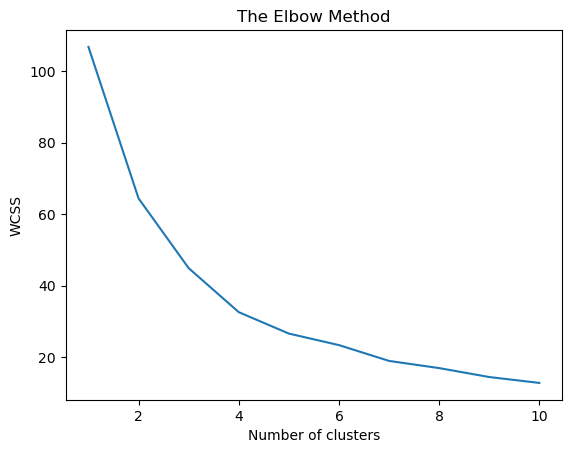

C:\Users\moham\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


4

In [40]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/kpradyumna095/Clustering-Crime-Dataset-Using-R/master/crime_data.csv')

#drop the missing values
dataset = dataset.dropna()

#droping the pre-existing cluster values
X = dataset.iloc[:,2:].values

#Normalization
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X=sc_X.fit_transform(X)

#spliting is not required(optional for later validation purpose)
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 0)

#Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

!pip install autoelbow
from autoelbow_rupakbob import autoelbow
n =autoelbow.auto_elbow_search(X)
n

# Which Optimizer work suitable for ML Algorithms

<table>
  <tbody><tr>
   <th>Algorithm
   </th>
   <th>Pros
   </th>
   <th>Cons
   </th>
   <th>Where to use
   </th>
  </tr>
  <tr>
   <td>Exhaustive search
   </td>
   <td>
<ul>
<li>All possible options are evaluated.</li>
<li>The most intuitive one.
</li>
</ul>
   </td>
   <td>
<ul>
<li>When there are many solutions, it becomes extremely slow.
</li>
</ul>
   </td>
   <td>
<ul>
<li>The database is small.</li>
<li>High accuracy is more important than the cost and speed of comp. 
</li>
</ul>
   </td>
  </tr>
  <tr>
   <td>Gradient
   </td>
   <td>
<ul>
<li>Computation efficient.</li>
<li>Stable.</li>
<li>Easy and quick to use.
</li>
</ul>
   </td>
   <td>
<ul>
<li>Doesn't work if there are multiple local minima.</li>
<li>If the learning rate is too large, you risk skipping the right solution.
</li>
</ul>
   </td>
   <td>
<ul>
<li>Need to optimize the model fast.</li>
<li>You can’t calculate the parameters linearly and have to search for them. 
</li>
</ul>
   </td>
  </tr>
  <tr>
   <td>Genetic
   </td>
   <td>
<ul>
<li>Can find good solutions in a short computation time.</li>
<li>Wide range of solutions (since it’s random).
</li>
</ul>
   </td>
   <td>
<ul>
<li>Can’t guarantee that the solution is optimal.</li>
<li>Hard to come up with good heuristics.
</li>
</ul>
   </td>
   <td>
<ul>
<li>Need to avoid getting stuck in local minima.
</li>
</ul>
   </td>
  </tr>
</tbody></table>

<h2 id="517e" class="ld le iy bm lf lg lh li lj lk ll lm ln ke lo kf lp kh lq ki lr kk ls kl lt lu ga" data-selectable-paragraph="">How many optimizers?</h2><p id="b1e3" class="pw-post-body-paragraph lv lw iy lx b ly lz jz ma mb mc kc md me mf mg mh mi mj mk ml mm mn mo mp mq ir ga" data-selectable-paragraph="">As just said, there are many optimizers. Each of them has advantages and disadvantages often related to the specific task.</p><p id="6006" class="pw-post-body-paragraph lv lw iy lx b ly mr jz ma mb ms kc md me mt mg mh mi mu mk ml mm mv mo mp mq ir ga" data-selectable-paragraph="">I like to divide optimizers into two families: gradient descent optimizers and <em class="mw">adaptive</em> optimizers. This division is exclusively based on an operational aspect which forces you to manually tune the <strong class="lx iz">learning rate</strong> in the case of Gradient Descent algorithms while it is automatically adapted<em class="mw"> </em>in adaptive algorithms — that’s why we have this name.</p><p id="2e87" class="pw-post-body-paragraph lv lw iy lx b ly mr jz ma mb ms kc md me mt mg mh mi mu mk ml mm mv mo mp mq ir ga" data-selectable-paragraph=""><strong class="lx iz tether-target-attached-top tether-abutted tether-abutted-top tether-element-attached-top tether-element-attached-center tether-target-attached-center">Gradient Descent:</strong></p><ul class=""><li id="5679" class="mx my iy lx b ly mr mb ms me mz mi na mm nb mq nc nd ne nf ga" data-selectable-paragraph="">Batch gradient descent</li><li id="63b0" class="mx my iy lx b ly ng mb nh me ni mi nj mm nk mq nc nd ne nf ga" data-selectable-paragraph="">Stochastic gradient descent</li><li id="b329" class="mx my iy lx b ly ng mb nh me ni mi nj mm nk mq nc nd ne nf ga" data-selectable-paragraph="">Mini-batch gradient descent</li></ul><p id="f0c2" class="pw-post-body-paragraph lv lw iy lx b ly mr jz ma mb ms kc md me mt mg mh mi mu mk ml mm mv mo mp mq ir ga" data-selectable-paragraph=""><strong class="lx iz">Adaptive:</strong></p><ul class=""><li id="d344" class="mx my iy lx b ly mr mb ms me mz mi na mm nb mq nc nd ne nf ga" data-selectable-paragraph="">Adagrad</li><li id="0acd" class="mx my iy lx b ly ng mb nh me ni mi nj mm nk mq nc nd ne nf ga" data-selectable-paragraph="">Adadelta</li><li id="8991" class="mx my iy lx b ly ng mb nh me ni mi nj mm nk mq nc nd ne nf ga" data-selectable-paragraph="">RMSprop</li><li id="7a46" class="mx my iy lx b ly ng mb nh me ni mi nj mm nk mq nc nd ne nf ga tether-target-attached-top tether-element-attached-top tether-element-attached-center tether-target-attached-center" data-selectable-paragraph="">Adam</li></ul><h2 id="8b26" class="ld le iy bm lf lg lh li lj lk ll lm ln ke lo kf lp kh lq ki lr kk ls kl lt lu ga" data-selectable-paragraph="">Gradient descent optimizers</h2><p id="9c81" class="pw-post-body-paragraph lv lw iy lx b ly lz jz ma mb mc kc md me mf mg mh mi mj mk ml mm mn mo mp mq ir ga" data-selectable-paragraph="">There are three types of gradient descent optimizers, which differ in how much data we use to compute the gradient of the objective function.</p><h2 id="dddc" class="nl le iy bm lf nm nn no lj np nq nr ln me ns nt lp mi nu nv lr mm nw nx lt ny ga" data-selectable-paragraph="">Batch gradient descent</h2><p id="ef58" class="pw-post-body-paragraph lv lw iy lx b ly lz jz ma mb mc kc md me mf mg mh mi mj mk ml mm mn mo mp mq ir ga" data-selectable-paragraph="">Also known as vanilla gradient descent, it’s the most basic algorithm among the three. It computes the gradients of the objective function <em class="mw">J </em>with respect to the parameters <em class="mw">θ </em>for the entire training set.</p><figure class="ko kp kq kr gx ks gl gm paragraph-image"><div class="gl gm nz"><picture><source data-testid="og" srcset="https://miro.medium.com/max/640/0*vlKJxSNXnpfWPw0v 640w, https://miro.medium.com/max/720/0*vlKJxSNXnpfWPw0v 720w, https://miro.medium.com/max/750/0*vlKJxSNXnpfWPw0v 750w, https://miro.medium.com/max/786/0*vlKJxSNXnpfWPw0v 786w, https://miro.medium.com/max/828/0*vlKJxSNXnpfWPw0v 828w, https://miro.medium.com/max/1100/0*vlKJxSNXnpfWPw0v 1100w, https://miro.medium.com/max/582/0*vlKJxSNXnpfWPw0v 582w" sizes="(min-resolution: 4dppx) and (max-width: 700px) 50vw, (-webkit-min-device-pixel-ratio: 4) and (max-width: 700px) 50vw, (min-resolution: 3dppx) and (max-width: 700px) 67vw, (-webkit-min-device-pixel-ratio: 3) and (max-width: 700px) 65vw, (min-resolution: 2.5dppx) and (max-width: 700px) 80vw, (-webkit-min-device-pixel-ratio: 2.5) and (max-width: 700px) 80vw, (min-resolution: 2dppx) and (max-width: 700px) 100vw, (-webkit-min-device-pixel-ratio: 2) and (max-width: 700px) 100vw, 291px"><img alt="" class="ce kx ky c" width="291" height="38" loading="lazy" role="presentation" src="https://miro.medium.com/max/291/0*vlKJxSNXnpfWPw0v"></picture></div><figcaption class="kz bl gn gl gm la lb bm b bn bo cn" data-selectable-paragraph="">Formula to update weights in batch gradient descent. The gradients are multiplied by the learning rate η and then used to update the parameters of the network.</figcaption></figure><p id="9035" class="pw-post-body-paragraph lv lw iy lx b ly mr jz ma mb ms kc md me mt mg mh mi mu mk ml mm mv mo mp mq ir ga" data-selectable-paragraph=""><mark class="vr vs po">As we use the entire dataset to perform </mark><mark class="vr vs po"><strong class="lx iz">just one step, </strong></mark><mark class="vr vs po">batch gradient descent can be very slow. Moreover, it is not suitable for datasets that don’t fit in memory.</mark></p><h2 id="20c6" class="nl le iy bm lf nm nn no lj np nq nr ln me ns nt lp mi nu nv lr mm nw nx lt ny ga" data-selectable-paragraph="">Stochastic gradient descent</h2><p id="6bd3" class="pw-post-body-paragraph lv lw iy lx b ly lz jz ma mb mc kc md me mf mg mh mi mj mk ml mm mn mo mp mq ir ga" data-selectable-paragraph="">It is an improved version of batch gradient descent. Instead of computing the gradients over the entire dataset, it performs a parameter update<strong class="lx iz"> for each example</strong> in the dataset.</p><p id="8bc0" class="pw-post-body-paragraph lv lw iy lx b ly mr jz ma mb ms kc md me mt mg mh mi mu mk ml mm mv mo mp mq ir ga" data-selectable-paragraph="">So the formula now depends also on the values of the input <em class="mw">x</em> and output <em class="mw">y</em>.</p><figure class="ko kp kq kr gx ks gl gm paragraph-image"><div class="gl gm oa"><picture><source data-testid="og" srcset="https://miro.medium.com/max/640/0*4v19i2QuYBna62Q8 640w, https://miro.medium.com/max/720/0*4v19i2QuYBna62Q8 720w, https://miro.medium.com/max/750/0*4v19i2QuYBna62Q8 750w, https://miro.medium.com/max/786/0*4v19i2QuYBna62Q8 786w, https://miro.medium.com/max/828/0*4v19i2QuYBna62Q8 828w, https://miro.medium.com/max/1100/0*4v19i2QuYBna62Q8 1100w, https://miro.medium.com/max/770/0*4v19i2QuYBna62Q8 770w" sizes="(min-resolution: 4dppx) and (max-width: 700px) 50vw, (-webkit-min-device-pixel-ratio: 4) and (max-width: 700px) 50vw, (min-resolution: 3dppx) and (max-width: 700px) 67vw, (-webkit-min-device-pixel-ratio: 3) and (max-width: 700px) 65vw, (min-resolution: 2.5dppx) and (max-width: 700px) 80vw, (-webkit-min-device-pixel-ratio: 2.5) and (max-width: 700px) 80vw, (min-resolution: 2dppx) and (max-width: 700px) 100vw, (-webkit-min-device-pixel-ratio: 2) and (max-width: 700px) 100vw, 385px"><img alt="" class="ce kx ky c" width="385" height="47" loading="lazy" role="presentation" src="https://miro.medium.com/max/385/0*4v19i2QuYBna62Q8"></picture></div><figcaption class="kz bl gn gl gm la lb bm b bn bo cn" data-selectable-paragraph="">Formula to update weights in SGD</figcaption></figure><p id="70d4" class="pw-post-body-paragraph lv lw iy lx b ly mr jz ma mb ms kc md me mt mg mh mi mu mk ml mm mv mo mp mq ir ga" data-selectable-paragraph="">The problem of SGD is that the updates are frequent and with a high variance, so the objective function heavily fluctuates during training.</p><p id="f26e" class="pw-post-body-paragraph lv lw iy lx b ly mr jz ma mb ms kc md me mt mg mh mi mu mk ml mm mv mo mp mq ir ga" data-selectable-paragraph="">This fluctuation can be an advantage with respect to batch gradient descent because it allows the function to jump to better local minima, but at the same time it can represent a disadvantage with respect to the convergence in a specific local minima.</p><p id="aabe" class="pw-post-body-paragraph lv lw iy lx b ly mr jz ma mb ms kc md me mt mg mh mi mu mk ml mm mv mo mp mq ir ga" data-selectable-paragraph="">A solution to this problem is to slowly decrease the learning rate value in order to make the updates smaller and smaller, so avoiding high oscillations.</p><h2 id="b6f8" class="nl le iy bm lf nm nn no lj np nq nr ln me ns nt lp mi nu nv lr mm nw nx lt ny ga" data-selectable-paragraph="">Mini batch gradient descent</h2><p id="6857" class="pw-post-body-paragraph lv lw iy lx b ly lz jz ma mb mc kc md me mf mg mh mi mj mk ml mm mn mo mp mq ir ga" data-selectable-paragraph="">The intuition behind this algorithm is to exploit the advantages of both gradient descent’s methods that we have seen so far.</p><p id="5320" class="pw-post-body-paragraph lv lw iy lx b ly mr jz ma mb ms kc md me mt mg mh mi mu mk ml mm mv mo mp mq ir ga" data-selectable-paragraph="">It basically computes the gradients on small batches of data in order to reduce the variance of the updates.</p><figure class="ko kp kq kr gx ks gl gm paragraph-image"><div class="gl gm ob"><picture><source data-testid="og" srcset="https://miro.medium.com/max/640/0*dEorRmc_Btu6n4O1 640w, https://miro.medium.com/max/720/0*dEorRmc_Btu6n4O1 720w, https://miro.medium.com/max/750/0*dEorRmc_Btu6n4O1 750w, https://miro.medium.com/max/786/0*dEorRmc_Btu6n4O1 786w, https://miro.medium.com/max/828/0*dEorRmc_Btu6n4O1 828w, https://miro.medium.com/max/1100/0*dEorRmc_Btu6n4O1 1100w, https://miro.medium.com/max/1098/0*dEorRmc_Btu6n4O1 1098w" sizes="(min-resolution: 4dppx) and (max-width: 700px) 50vw, (-webkit-min-device-pixel-ratio: 4) and (max-width: 700px) 50vw, (min-resolution: 3dppx) and (max-width: 700px) 67vw, (-webkit-min-device-pixel-ratio: 3) and (max-width: 700px) 65vw, (min-resolution: 2.5dppx) and (max-width: 700px) 80vw, (-webkit-min-device-pixel-ratio: 2.5) and (max-width: 700px) 80vw, (min-resolution: 2dppx) and (max-width: 700px) 100vw, (-webkit-min-device-pixel-ratio: 2) and (max-width: 700px) 100vw, 549px"><img alt="" class="ce kx ky c" width="549" height="49" loading="lazy" role="presentation" src="https://miro.medium.com/max/549/0*dEorRmc_Btu6n4O1"></picture></div><figcaption class="kz bl gn gl gm la lb bm b bn bo cn" data-selectable-paragraph="">Formula to update weights in mini batch gradient descent</figcaption></figure><h2 id="91fe" class="ld le iy bm lf lg lh li lj lk ll lm ln ke lo kf lp kh lq ki lr kk ls kl lt lu ga" data-selectable-paragraph=""><strong class="ba">Takeaways #1</strong></h2><ul class=""><li id="f7b3" class="mx my iy lx b ly lz mb mc me oc mi od mm oe mq nc nd ne nf ga" data-selectable-paragraph=""><strong class="lx iz">Mini batch gradient descent is the best choice</strong> among the three in most of the cases.</li><li id="9bcb" class="mx my iy lx b ly ng mb nh me ni mi nj mm nk mq nc nd ne nf ga" data-selectable-paragraph=""><strong class="lx iz">Learning rate tuning problem: </strong>all of them are subjected to the choice of a good learning rate. Unfortunately, this choice is not straighforward.</li><li id="0401" class="mx my iy lx b ly ng mb nh me ni mi nj mm nk mq nc nd ne nf ga" data-selectable-paragraph=""><strong class="lx iz">Not good for sparse data: </strong>there is no mechanism to put in evidence rarely occurring features. All parameters are updated equally.</li><li id="8cbf" class="mx my iy lx b ly ng mb nh me ni mi nj mm nk mq nc nd ne nf ga" data-selectable-paragraph="">High possibility of getting stuck into a <strong class="lx iz">suboptimal local minima</strong>.</li></ul><h2 id="f3a3" class="ld le iy bm lf lg lh li lj lk ll lm ln ke lo kf lp kh lq ki lr kk ls kl lt lu ga" data-selectable-paragraph="">Adaptive optimizers</h2><p id="4258" class="pw-post-body-paragraph lv lw iy lx b ly lz jz ma mb mc kc md me mf mg mh mi mj mk ml mm mn mo mp mq ir ga" data-selectable-paragraph="">This family of optimizers has been introduced to solve the issues of the gradient descent’s algorithms. Their most important feature is that they don’t require a tuning of the learning rate value. Actually some libraries — i.e. Keras — still let you the possibility to manually tune it for more advanced trials.</p><h2 id="7c1f" class="nl le iy bm lf nm nn no lj np nq nr ln me ns nt lp mi nu nv lr mm nw nx lt ny ga" data-selectable-paragraph="">Adagrad</h2><p id="12ab" class="pw-post-body-paragraph lv lw iy lx b ly lz jz ma mb mc kc md me mf mg mh mi mj mk ml mm mn mo mp mq ir ga" data-selectable-paragraph="">It adapts the learning rate to the parameters performing small updates for frequently occurring features and large updates for the rarest ones.</p><p id="f11d" class="pw-post-body-paragraph lv lw iy lx b ly mr jz ma mb ms kc md me mt mg mh mi mu mk ml mm mv mo mp mq ir ga" data-selectable-paragraph="">In this way, the network is able to capture information belonging to features that are not frequent, putting them in evidence and giving them the right weight.</p><p id="7ad1" class="pw-post-body-paragraph lv lw iy lx b ly mr jz ma mb ms kc md me mt mg mh mi mu mk ml mm mv mo mp mq ir ga" data-selectable-paragraph="">The problem of Adagrad is that it adjusts the learning rate for each parameter according to all the past gradients. So, the possibility of having a very small learning rate after a high number of steps — resulting from the accumulation of all the past gradients — is relevant.</p><p id="e4cb" class="pw-post-body-paragraph lv lw iy lx b ly mr jz ma mb ms kc md me mt mg mh mi mu mk ml mm mv mo mp mq ir ga" data-selectable-paragraph="">If the learning rate is too much small, we simply can’t update weights and the consequence is that the network doesn’t learn anymore.</p><h2 id="dec1" class="nl le iy bm lf nm nn no lj np nq nr ln me ns nt lp mi nu nv lr mm nw nx lt ny ga" data-selectable-paragraph="">Adadelta</h2><p id="afd2" class="pw-post-body-paragraph lv lw iy lx b ly lz jz ma mb mc kc md me mf mg mh mi mj mk ml mm mn mo mp mq ir ga" data-selectable-paragraph="">It improves the previous algorithm by introducing a history window which sets a fixed number of past gradients to take in consideration during the training.</p><p id="dae7" class="pw-post-body-paragraph lv lw iy lx b ly mr jz ma mb ms kc md me mt mg mh mi mu mk ml mm mv mo mp mq ir ga" data-selectable-paragraph="">In this way, we don’t have the problem of the vanishing learning rate.</p><h2 id="69f8" class="nl le iy bm lf nm nn no lj np nq nr ln me ns nt lp mi nu nv lr mm nw nx lt ny ga" data-selectable-paragraph="">RMSprop</h2><p id="8d99" class="pw-post-body-paragraph lv lw iy lx b ly lz jz ma mb mc kc md me mf mg mh mi mj mk ml mm mn mo mp mq ir ga" data-selectable-paragraph="">It is very similar to Adadelta. The only difference is in the way they manage the past gradients.</p><h2 id="47b0" class="nl le iy bm lf nm nn no lj np nq nr ln me ns nt lp mi nu nv lr mm nw nx lt ny ga" data-selectable-paragraph="">Adam</h2><p id="0e66" class="pw-post-body-paragraph lv lw iy lx b ly lz jz ma mb mc kc md me mf mg mh mi mj mk ml mm mn mo mp mq ir ga" data-selectable-paragraph="">It adds to the advantages of Adadelta and RMSprop, the storing of an exponentially decaying average of past gradients similar to momentum.</p><h2 id="04f7" class="ld le iy bm lf lg lh li lj lk ll lm ln ke lo kf lp kh lq ki lr kk ls kl lt lu ga" data-selectable-paragraph="">Takeaways #2</h2><ul class=""><li id="66d2" class="mx my iy lx b ly lz mb mc me oc mi od mm oe mq nc nd ne nf ga" data-selectable-paragraph=""><strong class="lx iz">Adam is the best</strong> <strong class="lx iz">among the adaptive optimizers</strong> in most of the cases.</li><li id="ee96" class="mx my iy lx b ly ng mb nh me ni mi nj mm nk mq nc nd ne nf ga" data-selectable-paragraph=""><strong class="lx iz">Good with sparse data</strong>: the adaptive learning rate is perfect for this type of datasets.</li><li id="416c" class="mx my iy lx b ly ng mb nh me ni mi nj mm nk mq nc nd ne nf ga" data-selectable-paragraph="">There is <strong class="lx iz">no need to focus on the learning rate</strong> value</li></ul><h2 id="94c5" class="ld le iy bm lf lg lh li lj lk ll lm ln ke lo kf lp kh lq ki lr kk ls kl lt lu ga" data-selectable-paragraph="">Gradient descent vs Adaptive</h2><p id="e883" class="pw-post-body-paragraph lv lw iy lx b ly lz jz ma mb mc kc md me mf mg mh mi mj mk ml mm mn mo mp mq ir ga" data-selectable-paragraph="">Adam is the best choice in general. Anyway, many recent papers state that SGD can bring to better results if combined with a good learning rate annealing schedule which aims to manage its value during the training.</p><p id="bd2a" class="pw-post-body-paragraph lv lw iy lx b ly mr jz ma mb ms kc md me mt mg mh mi mu mk ml mm mv mo mp mq ir ga" data-selectable-paragraph="">My suggestion is to <strong class="lx iz">first try Adam in any case</strong>, because it is more likely to return good results without an advanced fine tuning.</p><p id="e355" class="pw-post-body-paragraph lv lw iy lx b ly mr jz ma mb ms kc md me mt mg mh mi mu mk ml mm mv mo mp mq ir ga" data-selectable-paragraph="">Then, if Adam achieves good results, it could be a good idea to switch on SGD to see what happens.</p></div>

# Popular Algorithms in every feild in Ai

# SNN 

The 3rd generation of neural networks, spiking neural networks, aims to bridge the gap between neuroscience and machine learning, using biologically-realistic models of neurons to carry out computation. A spiking neural network (SNN) is fundamentally different from the neural networks that the machine learning community knows. SNNs operate using spikes, which are discrete events that take place at points in time, rather than continuous values. The occurrence of a spike is determined by differential equations that represent various biological processes, the most important of which is the membrane potential of the neuron. Essentially, once a neuron reaches a certain potential, it spikes, and the potential of that neuron is reset. The most common model for this is the Leaky integrate-and-fire (LIF) model. Additionally, SNNs are often sparsely connected and take advantage of specialized network topologies.

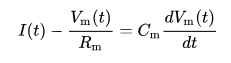
<center>Differential equation for membrane potential in the LIF model</center>



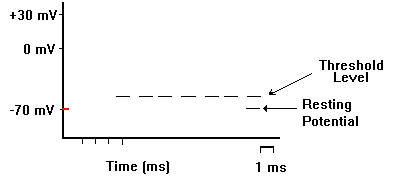
<center>Membrane potential behavior during a spike</center>

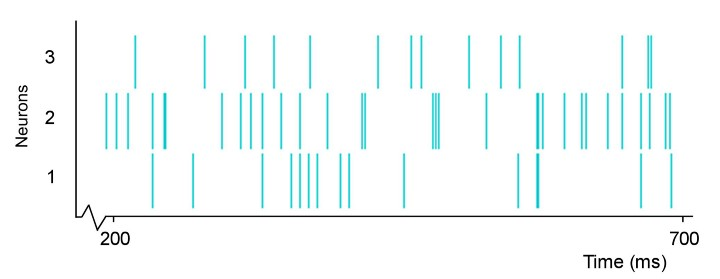
<center>Spike trains for a network of 3 neurons</center>


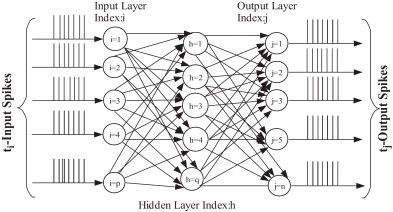
<center>A full spiking neural network</center>

# What is H2O?


H2O is fast, scalable, open-source machine learning and deep learning for Smarter Applications. With H2O, enterprises like PayPal, Nielsen Catalina, Cisco and others can use all of their data without sampling and get accurate predictions faster. Advanced algorithms, like Deep Learning, Boosting, and Bagging Ensembles are readily available for application designers to build smarter applications through elegant APIs. Some of our earliest customers have built powerful domain-specific predictive engines for Recommendations, Customer Churn, Propensity to Buy, Dynamic Pricing and Fraud Detection for the Insurance, Healthcare, Telecommunications, AdTech, Retail and Payment Systems.

Using in-memory compression techniques, H2O can handle billions of data rows in-memory, even with a fairly small cluster. The platform includes interfaces for R, Python, Scala, Java, JSON and Coffeescript/JavaScript, along with a built-in web interface, Flow, that make it easier for non-engineers to stitch together complete analytic workflows. The platform was built alongside (and on top of) both Hadoop and Spark Clusters and is typically deployed within minutes.

H2O implements almost all common machine learning algorithms, such as generalized linear modeling (linear regression, logistic regression, etc.), Naïve Bayes, principal components analysis, time series, k-means clustering, and others. H2O also implements best-in-class algorithms such as Random Forest, Gradient Boosting, and Deep Learning at scale. Customers can build thousands of models and compare them to get the best prediction results.

H2O is nurturing a grassroots movement of physicists, mathematicians, computer and data scientists to herald the new wave of discovery with data science. Academic researchers and Industrial data scientists collaborate closely with our team to make this possible. Stanford university giants Stephen Boyd, Trevor Hastie, Rob Tibshirani advise the H2O team to build scalable machine learning algorithms. With 100s of meetups over the past two years, H2O has become a word-of-mouth phenomenon growing amongst the data community by a 100-fold and is now used by 12,000+ users, deployed in 2000+ corporations using R, Python, Hadoop and Spark.



Tutorials : https://github.com/h2oai/h2o-tutorials


# Tensorflow to pytorch

# How Every activation function work

<div id="post-" class="post-142492 post type-post status-publish format-standard has-post-thumbnail hentry category-kdnuggets-originals tag-machine-learning">
<p>Let's start with a definition of <b>activation function</b>:</p>
<p>&nbsp;</p>
<blockquote><p>
<font size="+1"><b>“In artificial neural networks, each neuron forms a weighted sum of its inputs and passes the resulting scalar value through a function referred to as an activation function.”</b></font><b><br>
—<a href="https://en.wikipedia.org/wiki/Activation_function" rel="noopener" target="_blank">Definition from Wikipedia</a></b>
</p></blockquote>
<p>&nbsp;</p>
<p>Sounds a little complicated? Don’t worry! After reading this article, you will have a better understanding of activation functions.</p>
<p>&nbsp;<br>
<img src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_13.jpg" alt="How Activation Functions Work in Deep Learning" width="100%" data-lazy-src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_13.jpg" data-ll-status="loaded" class="entered lazyloaded"><noscript><img src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_13.jpg" alt="How Activation Functions Work in Deep Learning" width="100%" /></noscript><br>
&nbsp;</p>
<p>In humans, our brain receives input from the outside world, performs processing on the neuron receiving input and activates the neuron tail to generate required decisions. Similarly, in neural networks, we provide input as images, sounds, numbers, etc., and processing is performed on the artificial neuron, with an algorithm activating the correct final neuron layer to generate results.</p><div style="text-align: center" class="kdnug-2a705539931cc7a196724c0e9c3ccc08 kdnug-ros-mobile-in-content" id="kdnug-2a705539931cc7a196724c0e9c3ccc08"></div>
<p>&nbsp;</p>
<h2>Why do we need activation functions?</h2>
<p>&nbsp;<br>
An activation function determines if a neuron should be <b>activated or not activated</b>. This implies that it will use some simple mathematical operations to determine if the neuron’s input to the network is relevant or not relevant in the prediction process.</p>
<p>The ability to introduce <b>non-linearity</b> to an artificial neural network and generate output from a collection of input values fed to a layer is the purpose of the activation function.</p>
<p>&nbsp;</p>
<h2>Types of Activation functions</h2>
<p>&nbsp;<br>
Activation functions can be divided into three types:</p>
<ol>
<li>Linear Activation Function
</li><li>Binary Step Function
</li><li>Non-linear Activation Functions
</li></ol>
<p>&nbsp;</p>
<h3>Linear Activation Function</h3>
<p>&nbsp;<br>
The linear activation function, often called the <b>identity activation function</b>, is proportional to the input. The range of the linear activation function will be (-∞ to ∞). The linear activation function simply adds up the weighted total of the inputs and returns the result.</p>
<p>&nbsp;<br>
</p><center><img src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_18.png" alt="How Activation Functions Work in Deep Learning" width="100%" data-lazy-src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_18.png" data-ll-status="loaded" class="entered lazyloaded"><noscript><img src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_18.png" alt="How Activation Functions Work in Deep Learning" width="100%" /></noscript><br>
<font size="-1">Linear Activation Function&hairsp;—&hairsp;Graph</font></center><br>
&nbsp;<p></p>
<p>Mathematically, it can be represented as:</p>
<p>&nbsp;<br>
</p><center><img width="129" height="53" src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_3.jpg" alt="How Activation Functions Work in Deep Learning" data-lazy-src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_3.jpg" data-ll-status="loaded" class="entered lazyloaded"><noscript><img width="129" height="53" src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_3.jpg" alt="How Activation Functions Work in Deep Learning" /></noscript><br>
<font size="-1">Linear Activation Function&hairsp;—&hairsp;Equation</font></center><br>
&nbsp;<p></p>
<p><b>Pros and Cons</b></p>
<ul>
<li> It is not a binary activation because the linear activation function only delivers a range of activations. We can surely connect a few neurons together, and if there are multiple activations, we can calculate the max (or soft max) based on that.
</li><li>The derivative of this activation function is a constant. That is to say, the gradient is unrelated to the x (input).
</li></ul>
<p>&nbsp;</p>
<h3>Binary Step Activation Function</h3>
<p>&nbsp;<br>
A <b>threshold value</b> determines whether a neuron should be activated or not activated in a binary step activation function.</p>
<p>The activation function compares the input value to a threshold value. If the input value is greater than the threshold value, the neuron is activated. It’s disabled if the input value is less than the threshold value, which means its output isn’t sent on to the next or hidden layer.</p>
<p>&nbsp;<br>
</p><center><img src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_10.png" alt="How Activation Functions Work in Deep Learning" width="100%" data-lazy-src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_10.png" data-ll-status="loaded" class="entered lazyloaded"><noscript><img src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_10.png" alt="How Activation Functions Work in Deep Learning" width="100%" /></noscript><br>
<font size="-1">Binary Step Function&hairsp;—&hairsp;Graph</font></center><br>
&nbsp;<p></p>
<p>Mathematically, the binary activation function can be represented as:</p>
<p>&nbsp;<br>
</p><center><img width="311" height="116" src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_11.jpg" alt="How Activation Functions Work in Deep Learning" data-lazy-src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_11.jpg" data-ll-status="loaded" class="entered lazyloaded"><noscript><img width="311" height="116" src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_11.jpg" alt="How Activation Functions Work in Deep Learning" /></noscript><br>
<font size="-1">Binary Step Activation Function&hairsp;—&hairsp;Equation</font></center><br>
&nbsp;<p></p>
<p><b>Pros and Cons</b></p>
<ul>
<li>It cannot provide multi-value outputs&hairsp;—&hairsp;for example, it cannot be used for multi-class classification problems.
</li><li>The step function’s gradient is zero, which makes the back propagation procedure difficult.
</li></ul>
<p>&nbsp;</p>
<h3>Non-linear Activation Functions</h3>
<p>&nbsp;<br>
The non-linear activation functions are the most-used activation functions. They make it uncomplicated for an artificial neural network model to adapt to a variety of data and to differentiate between the outputs.</p>
<p>Non-linear activation functions allow the stacking of multiple layers of neurons, as the output would now be a non-linear combination of input passed through multiple layers. Any output can be represented as a functional computation output in a neural network.</p>
<p>These activation functions are mainly divided basis on their range and curves. The remainder of this article will outline the major non-linear activiation functions used in neural networks.</p>
<p>&nbsp;</p>
<h1>1. Sigmoid</h1>
<p>&nbsp;<br>
Sigmoid accepts a number as input and returns a number between 0 and 1. It’s simple to use and has all the desirable qualities of activation functions: nonlinearity, continuous differentiation, monotonicity, and a set output range.</p>
<p>This is mainly used in <b>binary classification problems.</b> This sigmoid function gives the probability of an existence of a particular class.</p>
<p>&nbsp;<br>
</p><center><img src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_7.png" alt="How Activation Functions Work in Deep Learning" width="100%" data-lazy-src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_7.png" data-ll-status="loaded" class="entered lazyloaded"><noscript><img src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_7.png" alt="How Activation Functions Work in Deep Learning" width="100%" /></noscript><br>
<font size="-1">Sigmoid Activation Function&hairsp;—&hairsp;Graph</font></center><br>
&nbsp;<p></p>
<p>Mathematically, it can be represented as:</p>
<p>&nbsp;<br>
</p><center><img width="235" height="112" alt="How Activation Functions Work in Deep Learning" data-lazy-src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_2.jpg" class="entered lazyloaded" src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_2.jpg" data-ll-status="loaded"><noscript><img width="235" height="112" src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_2.jpg" alt="How Activation Functions Work in Deep Learning" /></noscript><br>
<font size="-1">Sigmoid Activation Function&hairsp;—&hairsp;Equation</font></center><br>
&nbsp;<p></p>
<p><b>Pros and Cons</b></p>
<ul>
<li>It is non-linear in nature. Combinations of this function are also non-linear, and it will give an analogue activation, unlike binary step activation function. It has a smooth gradient too, and It’s good for a classifier type problem.
</li><li>The output of the activation function is always going to be in the range (0,1) compared to (-∞, ∞) of linear activation function. As a result, we’ve defined a range for our activations.
</li><li>Sigmoid function gives rise to a problem of <b>“Vanishing gradients”</b> and Sigmoids saturate and kill gradients.
</li><li>Its output<b> isn’t zero centred</b>, and it makes the gradient updates go too far in different directions. The output value is between zero and one, so it makes optimization harder.
</li><li>The network either refuses to learn more or is extremely slow.
</li></ul>
<p>&nbsp;</p>
<h1>2.TanH (Hyperbolic Tangent)</h1>
<p>&nbsp;<br>
TanH compress a real-valued number to the range <b>[-1, 1]</b>. It’s non-linear, But it’s different from Sigmoid,and its output is <b>zero-centered</b>. The main advantage of this is that the negative inputs will be mapped strongly to the negative and zero inputs will be mapped to almost zero in the graph of TanH.</p>
<p>&nbsp;<br>
</p><center><img src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_16.png" alt="How Activation Functions Work in Deep Learning" width="100%" data-lazy-src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_16.png" data-ll-status="loaded" class="entered lazyloaded"><noscript><img src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_16.png" alt="How Activation Functions Work in Deep Learning" width="100%" /></noscript><br>
<font size="-1">TanH Activation Function&hairsp;—&hairsp;Graph</font></center><br>
&nbsp;<p></p>
<p>Mathematically, TanH function can be represented as:</p>
<p>&nbsp;<br>
</p><center><img width="273" height="130" src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_12.jpg" alt="How Activation Functions Work in Deep Learning" data-lazy-src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_12.jpg" data-ll-status="loaded" class="entered lazyloaded"><noscript><img width="273" height="130" src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_12.jpg" alt="How Activation Functions Work in Deep Learning" /></noscript><br>
<font size="-1">TanH Activation Function&hairsp;—&hairsp;Equation</font></center><br>
&nbsp;<p></p>
<p><b>Pros and Cons</b></p>
<ul>
<li>TanH also has the vanishing gradient problem, but the gradient is stronger for TanH than sigmoid (derivatives are steeper).
</li><li>TanH is zero-centered, and gradients do not have to move in a specific direction.
</li></ul>
<p>&nbsp;</p>
<h1>3.ReLU (Rectified Linear Unit)</h1>
<p>&nbsp;<br>
ReLU stands for Rectified Linear Unit and is one of the most commonly used activation function in the applications. It’s solved the problem of vanishing gradient because the maximum value of the gradient of ReLU function is one. It also solved the problem of saturating neuron, since the slope is never zero for ReLU function. The range of ReLU is between <b>0 and infinity.</b></p>
<p>&nbsp;<br>
</p><center><img src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_1.png" alt="How Activation Functions Work in Deep Learning" width="100%" data-lazy-src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_1.png" data-ll-status="loaded" class="entered lazyloaded"><noscript><img src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_1.png" alt="How Activation Functions Work in Deep Learning" width="100%" /></noscript><br>
<font size="-1">ReLU Activation Function&hairsp;—&hairsp;Graph</font></center><br>
&nbsp;<p></p>
<p>Mathematically, it can be represented as:</p>
<p>&nbsp;<br>
</p><center><img width="265" height="54" src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_6.jpg" alt="How Activation Functions Work in Deep Learning" data-lazy-src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_6.jpg" data-ll-status="loaded" class="entered lazyloaded"><noscript><img width="265" height="54" src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_6.jpg" alt="How Activation Functions Work in Deep Learning" /></noscript><br>
<font size="-1">ReLU Activation Function&hairsp;—&hairsp;Equation</font></center><br>
&nbsp;<p></p>
<p><b>Pros and Cons</b></p>
<ul>
<li>Since only a certain number of neurons are activated, the ReLU function is far more computationally efficient when compared to the sigmoid and TanH functions.
</li><li>ReLU accelerates the convergence of gradient descent towards the global minimum of the loss function due to its linear, non-saturating property.
</li><li>One of its limitations is that <b>it should only be used within hidden layers </b>of an artificial neural network model.
</li><li>Some gradients can be fragile during training.
</li><li>In other words, For activations in the region (x&lt;0) of ReLu, the gradient will be 0 because of which the weights will not get adjusted during descent. That means, those neurons, which go into that state will stop responding to variations in input (simply because the gradient is 0, nothing changes.) This is called the <b>dying ReLu problem</b>.
</li></ul>
<p>&nbsp;</p>
<h1>4.Leaky ReLU</h1>
<p>&nbsp;<br>
Leaky ReLU is an upgraded version of the ReLU activation function to solve the dying ReLU problem, as it has a small positive slope in the negative area. But, the consistency of the benefit across tasks is presently ambiguous.</p>
<p>&nbsp;<br>
</p><center><img src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_19.png" alt="How Activation Functions Work in Deep Learning" width="100%" data-lazy-src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_19.png" data-ll-status="loaded" class="entered lazyloaded"><noscript><img src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_19.png" alt="How Activation Functions Work in Deep Learning" width="100%" /></noscript><br>
<font size="-1">Leaky ReLU Activation Function&hairsp;—&hairsp;Graph</font></center><br>
&nbsp;<p></p>
<p>Mathematically, it can be represented as,</p>
<p>&nbsp;<br>
</p><center><img width="282" height="64" alt="How Activation Functions Work in Deep Learning" data-lazy-src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_15.jpg" class="entered lazyloaded" src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_15.jpg" data-ll-status="loaded"><noscript><img width="282" height="64" src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_15.jpg" alt="How Activation Functions Work in Deep Learning" /></noscript><br>
<font size="-1">Leaky ReLU Activation Function&hairsp;—&hairsp;Equation</font></center><br>
&nbsp;<p></p>
<p><b>Pros and Cons</b></p>
<ul>
<li>The advantages of Leaky ReLU are the same as that of ReLU, in addition to the fact that it does enable back propagation, even for negative input values.
</li><li>Making minor modification of negative input values, the gradient of the left side of the graph comes out to be a real (non-zero) value. As a result, there would be no more dead neurons in that area.
</li><li>The predictions may not be steady for negative input values.
</li></ul>
<p>&nbsp;</p>
<h1>5.ELU (Exponential Linear Units)</h1>
<p>&nbsp;<br>
ELU is also one of the variations of ReLU which also solves the dead ReLU problem. ELU, just like leaky ReLU also considers negative values by introducing a new alpha parameter and multiplying it will another equation.</p>
<p>ELU is slightly more computationally expensive than leaky ReLU, and it’s very similar to ReLU except negative inputs. They are both in identity function shape for positive inputs.</p>
<p>&nbsp;<br>
</p><center><img src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_8.png" alt="How Activation Functions Work in Deep Learning" width="100%" data-lazy-src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_8.png" data-ll-status="loaded" class="entered lazyloaded"><noscript><img src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_8.png" alt="How Activation Functions Work in Deep Learning" width="100%" /></noscript><br>
<font size="-1">ELU Activation Function-Graph</font></center><br>
&nbsp;<p></p>
<p>Mathematically, it can be represented as:</p>
<p>&nbsp;<br>
</p><center><img width="301" height="115" alt="How Activation Functions Work in Deep Learning" data-lazy-src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_5.jpg" class="entered lazyloaded" src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_5.jpg" data-ll-status="loaded"><noscript><img width="301" height="115" src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_5.jpg" alt="How Activation Functions Work in Deep Learning" /></noscript><br>
<font size="-1">ELU Activation Function&hairsp;—&hairsp;Equation</font></center><br>
&nbsp;<p></p>
<p><b>Pros and Cons</b></p>
<ul>
<li>ELU is a strong alternative to ReLU. Different from the ReLU, ELU can produce negative outputs.
</li><li>Exponential operations are there in ELU, So it increases the computational time.
</li><li>No learning about the ‘a’ value takes place, and exploding gradient problem.
</li></ul>
<p>&nbsp;</p>
<h1>6. Softmax</h1>
<p>&nbsp;<br>
A combination of many sigmoids is referred to as the Softmax function. It determines relative probability. Similar to the sigmoid activation function, the Softmax function returns the probability of each class/labels. <b>In multi-class classification, softmax activation function is most commonly</b> <b>used for the last layer of the neural network.</b></p>
<p>The softmax function gives the probability of the current class with respect to others. This means that it also considers the possibility of other classes too.</p>
<p>&nbsp;<br>
</p><center><img src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_9.png" alt="How Activation Functions Work in Deep Learning" width="100%" data-lazy-src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_9.png" data-ll-status="loaded" class="entered lazyloaded"><noscript><img src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_9.png" alt="How Activation Functions Work in Deep Learning" width="100%" /></noscript><br>
<font size="-1">Softmax Activation Function&hairsp;—&hairsp;Graph</font></center><br>
&nbsp;<p></p>
<p>Mathematically, it can be represented as:</p>
<p>&nbsp;<br>
</p><center><img width="364" height="123" src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_4.png" alt="How Activation Functions Work in Deep Learning" data-lazy-src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_4.png" data-ll-status="loaded" class="entered lazyloaded"><noscript><img width="364" height="123" src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_4.png" alt="How Activation Functions Work in Deep Learning" /></noscript><br>
<font size="-1">Softmax Activation Function&hairsp;—&hairsp;Equation</font></center><br>
&nbsp;<p></p>
<p><b>Pros and Cons</b></p>
<ul>
<li>It mimics the one encoded label better than the absolute values.
</li><li>We would lose information if we used absolute (modulus) values, but the exponential takes care of this on its own.
</li><li>The softmax function <b>should be used for multi-label classification</b> and regression task as well.
</li></ul>
<p>&nbsp;</p>
<h1>7. Swish</h1>
<p>&nbsp;<br>
Swish allows for the propagation of a few numbers of negative weights, whereas ReLU sets all non-positive weights to zero. This is a crucial property that determines the success of non-monotonic smooth activation functions, such as Swish’s, in progressively deep neural networks.</p>
<p>It’s a self-gated activation function created by Google researchers.</p>
<p>&nbsp;<br>
</p><center><img src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_17.png" alt="How Activation Functions Work in Deep Learning" width="100%" data-lazy-src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_17.png" data-ll-status="loaded" class="entered lazyloaded"><noscript><img src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_17.png" alt="How Activation Functions Work in Deep Learning" width="100%" /></noscript><br>
<font size="-1">Swish Activation Function&hairsp;—&hairsp;Graph</font></center><br>
&nbsp;<p></p>
<p>Mathematically, it can be represented as:</p>
<p>&nbsp;<br>
</p><center><img width="120" height="62" alt="How Activation Functions Work in Deep Learning" data-lazy-src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_14.jpg" class="entered lazyloaded" src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_14.jpg" data-ll-status="loaded"><noscript><img width="120" height="62" src="https://www.kdnuggets.com/wp-content/uploads/activation-functions_14.jpg" alt="How Activation Functions Work in Deep Learning" /></noscript><br>
<font size="-1">Swish Activation Function&hairsp;—&hairsp;Equation</font></center><br>
&nbsp;<p></p>
<p><b>Pros and Cons</b></p>
<ul>
<li>Swish is a smooth activation function that means that it does not suddenly change direction like ReLU does near x equal to zero. Rather, it smoothly bends from 0 towards values &lt; 0 and then upwards again.
</li><li>Non-positive values were zeroed out in ReLU activation function. Negative numbers, on the other hand, may be valuable for detecting patterns in the data. Because of the sparsity, large negative numbers are wiped out, resulting in a win-win situation.
</li><li>The swish activation function being non-monotonous enhances the term of input data and weight to be learnt.
</li><li>Slightly more computationally expensive and More problems with the algorithm will probably arise given time.
</li></ul>
<p>&nbsp;</p>
<h1>Important Considerations</h1>
<p>&nbsp;<br>
While choosing the proper activation function, the following problems and issues must be considered:</p>
<p><b>Vanishing gradient</b> is a common problem encountered during neural network training. Like a sigmoid activation function, some activation functions have a small output range (0 to 1). So a huge change in the input of the sigmoid activation function will create a small modification in the output. Therefore, the derivative also becomes small. These activation functions are only used for shallow networks with only a few layers. When these activation functions are applied to a multi-layer network, the gradient may become too small for expected training.</p>
<p><b>Exploding gradients</b> are situations in which massive incorrect gradients build during training, resulting in huge updates to neural network model weights. When there are exploding gradients, an unstable network might form, and training cannot be completed. Due to exploding gradients, the weights’ values can potentially grow to the point where they overflow, resulting in loss in <b>NaN</b> values.</p>
<p>&nbsp;</p>
<h1>Final Takeaways</h1>
<p>&nbsp;</p>
<ul>
<li>All hidden layers generally use the same activation functions. <b>ReLU</b> activation function <b>should only </b>be used in the hidden layer for better results.
</li><li>Sigmoid and TanH activation functions <b>should not be utilized</b> in hidden layers due to the vanishing gradient, since they make the model more susceptible to problems during training.
</li><li>Swish function is used in artificial neural networks having a depth <b>more than 40 layers.</b>
</li><li>Regression problems&hairsp;should use&hairsp;linear activation functions
</li><li>Binary classification problems should use the sigmoid activation function
</li><li>Multiclass classification problems&hairsp;shold use the softmax activation function
</li></ul>
<p>Neural network architecture and their usable activation functions,</p>
<ul>
<li>Convolutional Neural Network (CNN): ReLU activation function
</li><li>Recurrent Neural Network (RNN): TanH or sigmoid activation functions
</li></ul>
</div>

# Activation Function in last layer

<div class="col-md-7 middle">
    























<div>
<h2><span>Last-layer activation and loss function&nbsp;</span>combinations</h2>
<p></p>
<table class="table table-striped">
<thead>
<tr>
<td>
<p><strong>Problem type</strong></p>
</td>
<td>
<p><strong>Last-layer activation</strong></p>
</td>
<td>
<p><strong>Loss function</strong></p>
</td>
<td>
<p><strong>Example</strong></p>
</td>
</tr>
</thead>
<tbody>
<tr>
<td>
<p>Binary classification</p>
</td>
<td>
<p>sigmoid</p>
</td>
<td>
<p>binary_crossentropy</p>
</td>
<td>
<p>Dog vs cat,</p>
<p>Sentiemnt analysis(pos/neg)</p>
</td>
</tr>
<tr>
<td>
<p>Multi-class, single-label classification</p>
</td>
<td>
<p>softmax</p>
</td>
<td>
<p>categorical_crossentropy</p>
</td>
<td>
<p>MNIST has 10 classes single label (one prediction is one digit)</p>
</td>
</tr>
<tr>
<td>
<p>Multi-class, multi-label classification</p>
</td>
<td>
<p>sigmoid</p>
</td>
<td>
<p>binary_crossentropy</p>
</td>
<td>
<p>News tags classification, one blog can have multiple tags</p>
</td>
</tr>
<tr>
<td>
<p>Regression to arbitrary values</p>
</td>
<td>
<p>None</p>
</td>
<td>
<p>mse</p>
</td>
<td>
<p>Predict house price(an integer/float point)</p>
</td>
</tr>
<tr>
<td>
<p>Regression to values between 0 and 1</p>
</td>
<td>
<p>sigmoid</p>
</td>
<td>
<p>mse&nbsp;or&nbsp;binary_crossentropy</p>
</td>
<td>
<p>Engine health assessment where 0 is broken, 1 is new</p>
</td>
</tr>
</tbody>
</table>
</div>
<p></p>
<h2>Binary classification&nbsp;- Dog VS Cat</h2>
<p>This <a href="https://www.kaggle.com/c/dogs-vs-cats">competition on Kaggle </a>is where you write an algorithm to classify whether images contain either a dog or a cat. It is a binary classification task where the output of the model is a single number range from 0~1 where the lower value indicates the image is more "Cat" like, and higher value if the model thing the image is more "Dog" like.</p>
<p>Here are&nbsp;the code for the last fully connected layer and the loss function used for the model</p>
<div class="highlight">
<pre style="position: relative;"><span></span><span class="c1">#Dog VS Cat last Dense layer</span>
<span class="n">model</span><span class="o">.</span><span class="n">add</span><span class="p">(</span><span class="n">layers</span><span class="o">.</span><span class="n">Dense</span><span class="p">(</span><span class="mi">1</span><span class="p">,</span> <span class="n">activation</span><span class="o">=</span><span class="s1">'sigmoid'</span><span class="p">))</span>
<span class="n">model</span><span class="o">.</span><span class="n">compile</span><span class="p">(</span><span class="n">loss</span><span class="o">=</span><span class="s1">'binary_crossentropy'</span><span class="p">,</span>
              <span class="n">optimizer</span><span class="o">=</span><span class="n">optimizers</span><span class="o">.</span><span class="n">RMSprop</span><span class="p">(</span><span class="n">lr</span><span class="o">=</span><span class="mf">1e-4</span><span class="p">),</span>
              <span class="n">metrics</span><span class="o">=</span><span class="p">[</span><span class="s1">'acc'</span><span class="p">])</span>
<div class="open_grepper_editor" title="Edit &amp; Save To Grepper"></div></pre>
</div>
<p>If you are interested in the full source code for this dog vs cat task, take a look at this <a href="https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/5.2-using-convnets-with-small-datasets.ipynb">awesome tutorial</a> on GitHub.</p>
<h2>Multi-class single-label classification - MNIST</h2>
<p>The&nbsp;task is to classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 categories (0 to 9). The dataset came with Keras package so it's very easy to have a try.</p>
<p>Last layer use "<strong>softmax</strong>" activation, which means it will return an array of 10 probability scores (summing to 1). Each score will be the probability that the current digit image belongs to one of our 10 digit classes.</p>
<div class="highlight">
<pre style="position: relative;"><span></span><span class="c1"># MNIST last Dense layer</span>
<span class="n">model</span><span class="o">.</span><span class="n">add</span><span class="p">(</span><span class="n">layers</span><span class="o">.</span><span class="n">Dense</span><span class="p">(</span><span class="mi">10</span><span class="p">,</span> <span class="n">activation</span><span class="o">=</span><span class="s1">'softmax'</span><span class="p">))</span>
<span class="n">model</span><span class="o">.</span><span class="n">compile</span><span class="p">(</span><span class="n">optimizer</span><span class="o">=</span><span class="s1">'rmsprop'</span><span class="p">,</span>
              <span class="n">loss</span><span class="o">=</span><span class="s1">'categorical_crossentropy'</span><span class="p">,</span>
              <span class="n">metrics</span><span class="o">=</span><span class="p">[</span><span class="s1">'accuracy'</span><span class="p">])</span>
<div class="open_grepper_editor" title="Edit &amp; Save To Grepper"></div></pre>
</div>
<p>Again the<a href="https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/5.1-introduction-to-convnets.ipynb"> full source code</a>&nbsp;for MNIST classification is provided on GitHub.</p>
<h2>Multi-class, multi-label classification - News tags classification</h2>
<p><a href="https://archive.ics.uci.edu/ml/machine-learning-databases/reuters21578-mld/">Reuters-21578</a> is a collection of about 20K news-lines and categorized with 672 labels. They are divided into five main categories:</p>
<ul>
<li>Topics</li>
<li>Places</li>
<li>People</li>
<li>Organizations</li>
<li>Exchanges</li>
</ul>
<p>For example, one news can&nbsp;have 3 tags</p>
<ul>
<li>Places: USA, China</li>
<li>Topics:&nbsp; trade</li>
</ul>
<div class="highlight">
<pre style="position: relative;"><span></span><span class="c1"># News tags classification last Dense layer</span>
<span class="n">model</span><span class="o">.</span><span class="n">add</span><span class="p">(</span><span class="n">Dense</span><span class="p">(</span><span class="n">num_categories</span><span class="p">,</span> <span class="n">activation</span><span class="o">=</span><span class="s1">'sigmoid'</span><span class="p">))</span>
<span class="n">model</span><span class="o">.</span><span class="n">compile</span><span class="p">(</span><span class="n">loss</span><span class="o">=</span><span class="s1">'binary_crossentropy'</span><span class="p">,</span> 
              <span class="n">optimizer</span><span class="o">=</span><span class="s1">'adam'</span><span class="p">,</span> <span class="n">metrics</span><span class="o">=</span><span class="p">[</span><span class="s1">'accuracy'</span><span class="p">])</span>
<div class="open_grepper_editor" title="Edit &amp; Save To Grepper"></div></pre>
</div>
<p>You can take a look at the<a href="https://github.com/Tony607/Text_multi-class_multi-label_Classification"> source code for this task</a> on my GitHub.</p>
<p>I also wrote <a href="https://www.dlology.com/blog/how-to-do-multi-class-multi-label-classification-for-news-categories/">another blog for this task in detail</a> as well, check out if you are interested.</p>
<h2>Regression to arbitrary values - Bosten Housing price prediction</h2>
<p>The goal is to predict a single continuous value&nbsp;instead of a discrete label&nbsp;of the house price with given data.</p>
<p>The network ends with a Dense without any activation because applying any activation function like sigmoid will constrain the value to 0~1 and we don't want that to happen.</p>
<p>The <strong>mse</strong> loss function, it computes the square of the difference between the predictions and the targets, a widely used loss function for regression tasks.</p>
<div class="highlight">
<pre style="position: relative;"><span></span><span class="c1"># predict house price last Dense layer</span>
<span class="n">model</span><span class="o">.</span><span class="n">add</span><span class="p">(</span><span class="n">layers</span><span class="o">.</span><span class="n">Dense</span><span class="p">(</span><span class="mi">1</span><span class="p">))</span>
<span class="n">model</span><span class="o">.</span><span class="n">compile</span><span class="p">(</span><span class="n">optimizer</span><span class="o">=</span><span class="s1">'rmsprop'</span><span class="p">,</span> <span class="n">loss</span><span class="o">=</span><span class="s1">'mse'</span><span class="p">,</span> <span class="n">metrics</span><span class="o">=</span><span class="p">[</span><span class="s1">'mae'</span><span class="p">])</span>
<div class="open_grepper_editor" title="Edit &amp; Save To Grepper"></div></pre>
</div>
<p>Full <a href="https://nbviewer.jupyter.org/github/fchollet/deep-learning-with-python-notebooks/blob/master/3.7-predicting-house-prices.ipynb">source code</a> can be found in the same GitHub repo.</p>
<h2>Regression to values between 0 and 1</h2>
<p>For a task like making an assessment&nbsp;of the health condition of a jet engine providing several sensors recordings. We want the output to be a continuous value from 0~1 where 0 means the engine needs to be replaced and 1 means it is in perfect condition, whereas the value between 0 and 1 may mean some degree of maintenance is needed. Compare to previous regression problem we are applying the "sigmoid" activation to the last dense layer to constrain the value between 0 to 1.</p>
<div class="highlight">
<pre style="position: relative;"><span></span><span class="c1"># Jet engine health assessment last Dense layer</span>
<span class="n">model</span><span class="o">.</span><span class="n">add</span><span class="p">(</span><span class="n">layers</span><span class="o">.</span><span class="n">Dense</span><span class="p">(</span><span class="mi">1</span><span class="p">,</span> <span class="n">activation</span><span class="o">=</span><span class="s1">'sigmoid'</span><span class="p">))</span>
<span class="n">model</span><span class="o">.</span><span class="n">compile</span><span class="p">(</span><span class="n">optimizer</span><span class="o">=</span><span class="s1">'rmsprop'</span><span class="p">,</span> <span class="n">loss</span><span class="o">=</span><span class="s1">'mse'</span><span class="p">,</span> <span class="n">metrics</span><span class="o">=</span><span class="p">[</span><span class="s1">'mae'</span><span class="p">])</span>
<div class="open_grepper_editor" title="Edit &amp; Save To Grepper"></div></pre>
</div>
</div>

# backpropagation

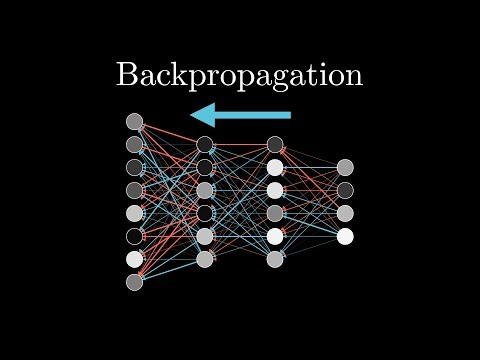

In [43]:
from IPython.display import YouTubeVideo
# a talk about IPython at Sage Days at U. Washington, Seattle.
# Video credit: William Stein.
YouTubeVideo('Ilg3gGewQ5U')


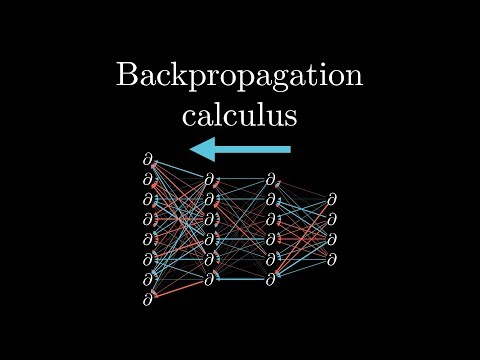

In [44]:
from IPython.display import YouTubeVideo
# a talk about IPython at Sage Days at U. Washington, Seattle.
# Video credit: William Stein.
YouTubeVideo('tIeHLnjs5U8')